# Forest and Tree plots

In [1]:
# %%%%%%%% imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plot_misc.forest as forest
import plot_misc.example_data.examples as examples
from scipy.stats import norm
from matplotlib.lines import Line2D
from plot_misc import utils as plm_utils
%matplotlib inline


In [2]:
# import example data
combined = examples.load_forest_data()

# constants
CMTOINCH = 1/2.54
SHAPE_DICT = {'PGS only': 'o', 'PGS plus': 's', 'PGS extended': 'H'}
COL_DICT = {'wo T2DM/CVD': 'orangered', 'w T2DM': 'blueviolet',
              'w T2DM & CVD': 'limegreen'}
STRING_COL = 'string'

# add y-axis values
combined.sort_values(['evaluated_outcome','subgroup_name'],  inplace=True)
sort_dict = {'CVD + AF + HF': 0, 'CVD': 1, 'CHD': 2, 'Ischaemic Stroke': 5,
             'HF': 3, 'AF': 4}
combined = forest.assign_distance(combined, group='evaluated_outcome', strata='model',
                            sort_dict=sort_dict, between_pad=6, 
                                )

# add colours and shape
combined['col'] = combined.subgroup_name.map(COL_DICT)
combined['shape'] = combined.model.map(SHAPE_DICT)

# select a single 'study'
single = combined[combined.model=='PGS only'].copy()
single[STRING_COL] = \
single['test_cstatistic'].map('{:,.2f}'.format) + ' (' + \
single['test_cstatistic_lb'].map('{:,.2f}'.format) + ';' + \
single['test_cstatistic_ub'].map('{:,.2f}'.format) + ')'

## Complex Forest Plot
We will start with a rather complex forest plot with multiple values on the same line and the confidence interval 
presented within the shape.

/home/amand/google_drive/Research/plot-misc/plot_misc/forest.py:456: FutureWarning: `shape_size` will be deprecated in future, please use `s_size_col` instead. Note that s_size_col takes precedence over `shape_size` without further warning.
  warnings.warn('`shape_size` will be deprecated in future, please use '


{0: {'min': 1.0, 'max': 8.0, 'kwargs': {'color': 'white', 'zorder': 0}}, 1: {'min': 8.0, 'max': 18.0, 'kwargs': {'color': 'lightgrey', 'zorder': 0}}, 2: {'min': 18.0, 'max': 28.0, 'kwargs': {'color': 'white', 'zorder': 0}}, 3: {'min': 28.0, 'max': 38.0, 'kwargs': {'color': 'lightgrey', 'zorder': 0}}, 4: {'min': 38.0, 'max': 48.0, 'kwargs': {'color': 'white', 'zorder': 0}}, 5: {'min': 48.0, 'max': 57.0, 'kwargs': {'color': 'lightgrey', 'zorder': 0}}}


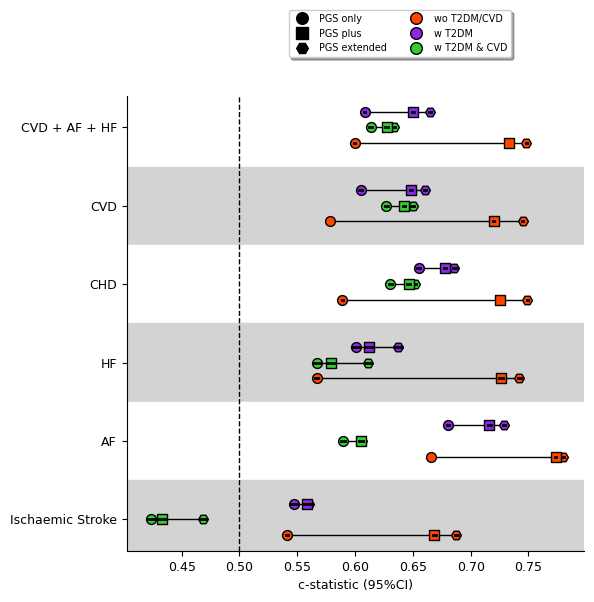

In [3]:
# figure
f, ax = plt.subplots(1, figsize=(15*CMTOINCH, 15*CMTOINCH))
_, ax, log = forest.plot_forest(df=combined, x_col='test_cstatistic', lb_col='test_cstatistic_lb',
                           ub_col='test_cstatistic_ub', s_col='shape', c_col='col', shape_size= 50,
                           ci_colour='black', g_col='evaluated_outcome', connect_shape=True, 
                           ax=ax, span_return=True,
                           ylim=(-1,57),
                           kwargs_scatter_dict={'edgecolors':'black'},
                           kwargs_connect_segments_dict={'zorder':1},
                          )

# change format

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('c-statistic (95%CI)', fontsize=9)
ax.tick_params('both', labelsize=9)
ax.axvline(0.5, linewidth=1, linestyle='--', c='black')

# legend
SHAPE_val = list(SHAPE_DICT.values())
SHAPE_key = list(SHAPE_DICT.keys())
COL_val = list(COL_DICT.values())
COL_key = list(COL_DICT.keys())
leg_handles = []

for i in range(len(SHAPE_key)):
    leg_handles = leg_handles +  [
        Line2D([0], [0], marker=SHAPE_val[i], color='black',
               markersize=14, lw=0.0, label=SHAPE_key[i]
              )
    ]

for i in range(len(COL_key)):
    leg_handles = leg_handles +  [
        Line2D([0], [0], marker='o', color=COL_val[i],
               markersize=14, markeredgecolor='black', lw=0,
               label=COL_key[i]
              )
    ]

ax.legend(handles=leg_handles , ncol=2, bbox_to_anchor=(0.85, 1.20),
          fancybox=True, shadow=True, fontsize='x-small', markerscale=0.6
         )
# printing the span parameters. 
print(log.span)

## Classic forest plot

Next we will use the same function to depict a more classical forest plot with a single estimate and confidence interval on each line. Note that due to the study sample size the confidence are very small and plotting the confidence interval _on top_ of the shape will usually look better. 

/home/amand/google_drive/Research/plot-misc/plot_misc/forest.py:456: FutureWarning: `shape_size` will be deprecated in future, please use `s_size_col` instead. Note that s_size_col takes precedence over `shape_size` without further warning.
  warnings.warn('`shape_size` will be deprecated in future, please use '


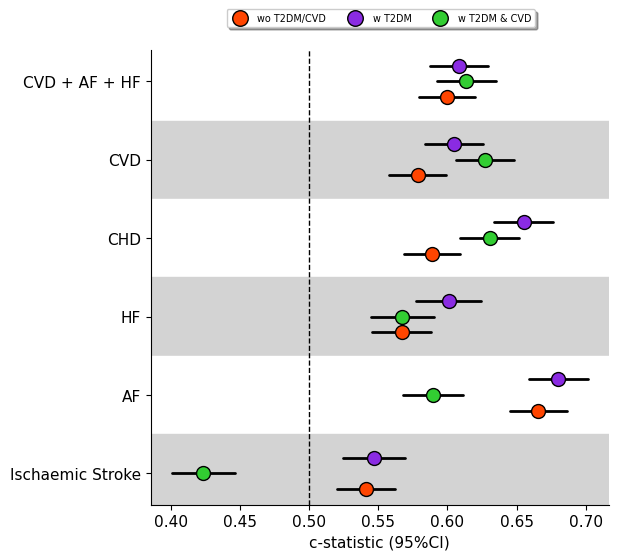

In [4]:
# increasing the ci to better showcase the function
single['test_cstatistic_lb'] = single['test_cstatistic_lb'] - 0.02
single['test_cstatistic_ub'] = single['test_cstatistic_ub'] + 0.02

# figure
f, ax = plt.subplots(1, figsize=(15*CMTOINCH, 15*CMTOINCH))
_, ax, _ = forest.plot_forest(df=single, x_col='test_cstatistic', lb_col='test_cstatistic_lb',
                           ub_col='test_cstatistic_ub', s_col='shape', c_col='col', ci_colour='black',
                           g_col='evaluated_outcome', shape_size= 100, ci_lwd=2,
                           ax=ax, ylim=(-1,57),
                           kwargs_scatter_dict={'edgecolors':'black'},
                           # plotting the confidence intervals behind the dots, and rounding the lines ends
                           kwargs_plot_ci_dict={'zorder':1, 'solid_capstyle':'round',
                                               'linestyle':'-'} 
                          )

# change format
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('c-statistic (95%CI)', fontsize=11)
ax.tick_params('both', labelsize=11)
ax.axvline(0.5, linewidth=1, linestyle='--', c='black')
#ax.set_xlim([0.55, 0.60])

# legend
COL_val = list(COL_DICT.values())
COL_key = list(COL_DICT.keys())
leg_handles = []

for i in range(len(COL_key)):
    leg_handles = leg_handles +  [
        Line2D([0], [0], marker='o', color=COL_val[i],
               markersize=14, markeredgecolor='black', lw=0,
               label=COL_key[i]
              )
    ]

ax.legend(handles=leg_handles , ncol=3, bbox_to_anchor=(0.85, 1.10),
          fancybox=True, shadow=True, fontsize='x-small', markerscale=0.8
         )


## Add side table

/home/amand/google_drive/Research/plot-misc/plot_misc/forest.py:456: FutureWarning: `shape_size` will be deprecated in future, please use `s_size_col` instead. Note that s_size_col takes precedence over `shape_size` without further warning.
  warnings.warn('`shape_size` will be deprecated in future, please use '


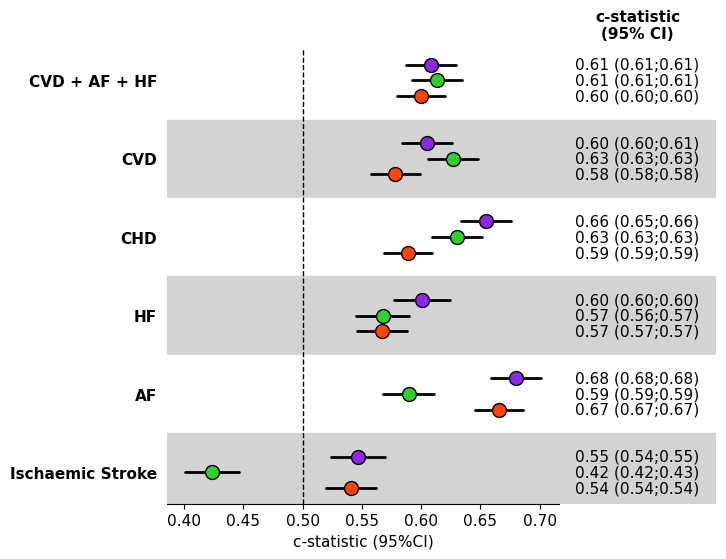

In [5]:
# create subplot and remove space
f, ax = plt.subplots(1, ncols=2, figsize=(18*CMTOINCH, 15*CMTOINCH),
                     gridspec_kw={'width_ratios': [10,4]},
                     sharey=False,
                     )
plt.subplots_adjust(wspace=0)

# add forest plot
_, _, log = forest.plot_forest(df=single, x_col='test_cstatistic',
                           lb_col='test_cstatistic_lb',
                           ub_col='test_cstatistic_ub',
                           s_col='shape', c_col='col', ci_colour='black',
                           g_col='evaluated_outcome', shape_size= 100, ci_lwd=2,
                           ax=ax[0], ylim=(-1, 57),
                           span_return=True,
                           kwargs_scatter_dict={'edgecolors':'black'},
                           kwargs_plot_ci_dict={'zorder':1, 'solid_capstyle':'round',
                                               'linestyle':'-'}
                          )
ax[0].spines[['right', 'left', 'top']].set_visible(False)
ax[0].set_xlabel('c-statistic (95%CI)', fontsize=11)
ax[0].tick_params('both', labelsize=11, left=False)
ax[0].yaxis.set_ticklabels(ax[0].yaxis.get_ticklabels(),
                           weight='bold', size=11,
                          )
ax[0].axvline(0.5, linewidth=1, linestyle='--', c='black')

# add side-table
ax[1].set_ylim(ax[0].get_ylim())
span = log.__getattribute__('span')
_ = forest.plot_table(single, annoteheader='c-statistic\n(95% CI)',
                  string_col=STRING_COL, ax=ax[1],
                  halignment_text='center',
                  halignment_header='center',
                  pad_header=1,
                  size_text=11, size_header=11,
                  negative_padding=3,
                  span=span,
                  )


## Tree plots

Instead of plotting a forest of estimates, we can use tree plots to illustrate individual estimates and the parameter space which is supported by the observed data. Essentially this depicts the confidence interval emperical coverage across a range of values between 0 and 1. 


Text(0.32, 0.4, 'Excludes an\nHR of 1.25')

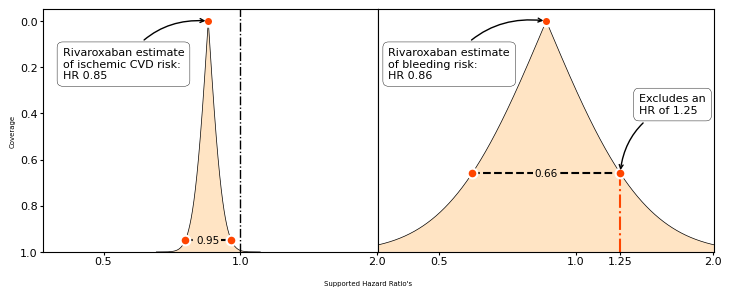

In [6]:
COL1='orangered'
COL2='white'
COL3='bisque'
TICK_LABEL_SIZE = 8
TITLE_SIZE = 5
ANNOT_LINE_WIDTH=1
ARROW_SCALE=7
MARKER_EDGE_SIZE=4
TICK_LENGTH = 2.5
AFONTSIZE=8
NEW_XAXIS=[ 0.50, 1.0, 1.50, 2.0, ]
STRING='string'
XLAB='HR (95%CI)'

ESTIMATES = list(np.log([0.85, 0.86]))
SE = list(np.divide([(np.log(0.96) - np.log(0.76)), (np.log(1.87) - np.log(0.40))], 3.92))
ALPHA=list(np.linspace(1, 0.00001, 10000))
NEW_XAXIS=[0.35, 0.50, 1.00, 2.00]
NEW_XAXIS=[NEW_XAXIS, NEW_XAXIS+[1.25]]
XMIN=np.log(0.86)-0.85
XMAX=np.log(0.86)+0.85
# the 0.65795 indicates the point the ub is less than 1.25
Y125=0.342041
UB125=0.6579592169216922
ANNOT_CI=[[0.95], [UB125]]

# plotting
f, ax = plt.subplots(1, ncols=2, figsize=(22*CMTOINCH, 8*CMTOINCH),
                     gridspec_kw={'width_ratios': [1,1],
                                  'wspace':0},
                     sharey=False,
                     )
for i, _ in enumerate(ax):
    space=forest.EmpericalSupport(estimate=ESTIMATES[i], standard_error=SE[i],
                                  alpha=ALPHA)
    _, _, results = space.plot_tree(
        annotate_estimate=True, annotate_ci=ANNOT_CI[i],
        area_c='bisque',
        # support='compatibility',
        ax=ax[i],
        # line arguments
        linewidth=0.5,
        # dot arguments
        estimate_c=COL1, estimate_size=50, kwargs_dot={'edgecolor':COL2, 'linewidth':2},
        # area arguments
        area_a=1.00,
        # argument for the horizontal text
        kwargs_text={'fontsize':7.5, 'backgroundcolor':COL3,
                     'bbox':{'facecolor':COL3, 'alpha':1.00,
                             'edgecolor':'none', 'pad':1}},
        # arguments for the horizontal line
        kwargs_segment={'linestyle':'--', 'linewidth':1.5,
                        'markersize':7, 'markeredgewidth':1.5,
                        'markeredgecolor':COL2}
    )
    # axes
    plm_utils.utils.change_ticks(ax[i], ticks=NEW_XAXIS[i], log=True)
    ax[i].set_xlim(XMIN, XMAX)
    ax[i].tick_params(axis='x', labelsize=TICK_LABEL_SIZE, length=TICK_LENGTH,
                      pad=0.5)
    ax[i].set_xlabel(None)
    ax[i].set_ylim(1.0, ax[i].get_ylim()[1])

# ###### add a vertical line
ax[0].axvline(0.0, linewidth=1.0, linestyle='-.', c='black')
ax[1].axvline(np.log(1.25),  linewidth=1.5, ymax=Y125,
              linestyle='-.', c=COL1, zorder=1)
# ##### Working on a specific axis
ax[0].set_ylabel(ax[0].get_ylabel(), fontsize=5, labelpad=3.0,)
ax[0].tick_params(axis='y', labelsize=TICK_LABEL_SIZE, length=TICK_LENGTH,
                  pad=1.0,)
ax[1].set_yticks([])
ax[1].set_yticklabels([])
ax[1].set_ylabel(None)
# ##### Common label
f.text(0.5, 0.005, "Supported Hazard Ratio's", ha='center',
         fontsize=5)
# #### Annotations
ax[0].annotate( 'Rivaroxaban estimate\nof ischemic CVD risk:\nHR {}'.\
               format(np.exp(ESTIMATES[0])),
               xy=(ESTIMATES[0], 0), xytext=(-0.9, 0.25),
               fontsize=AFONTSIZE,
               arrowprops=dict(
                   arrowstyle='->', connectionstyle='arc3,rad=-0.3',
                   linewidth=ANNOT_LINE_WIDTH, mutation_scale=ARROW_SCALE,
               ),
               bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=1.0,
                         linewidth=0.3, edgecolor='black',
                         )
               )
ax[1].annotate( 'Rivaroxaban estimate\nof bleeding risk:\nHR {}'.\
               format(np.exp(ESTIMATES[1])),
               xy=(ESTIMATES[1], 0), xytext=(-0.95, 0.25),
               fontsize=AFONTSIZE,
               arrowprops=dict(
                   arrowstyle='->', connectionstyle='arc3,rad=-0.3',
                   linewidth=ANNOT_LINE_WIDTH, mutation_scale=ARROW_SCALE,
               ),
               bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=1.0,
                         linewidth=0.3, edgecolor='black',
                         )
               )

ax[1].annotate( 'Excludes an\nHR of 1.25'.\
               format(np.exp(ESTIMATES[1])),
               xy=(np.log(1.25), 1-Y125), xytext=(0.32, 0.40),
               fontsize=AFONTSIZE,
               arrowprops=dict(
                   arrowstyle='->', connectionstyle='arc3,rad=0.3',
                   linewidth=ANNOT_LINE_WIDTH, mutation_scale=ARROW_SCALE,
               ),
               bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=1.0,
                         linewidth=0.3, edgecolor='black',
                         )
               )



In [7]:
help(forest)

Help on module plot_misc.forest in plot_misc:

NAME
    plot_misc.forest

DESCRIPTION
    A module to draw forest plots and side tables, as well as related illustrations
    such as tree plots.

    Aside from the plotting functions the module contains functions to
    appropriately orientated input DataFrames.

CLASSES
    builtins.object
        EmpericalSupport
        PlotForestResults
            EmpericalSupportPlotResults

    class EmpericalSupport(builtins.object)
     |  EmpericalSupport(estimate: float, standard_error: float, alpha: List[float])
     |
     |  A class to calculate and plot a somewhat historic empirical support plot
     |  that essentially plots all the possible confidence intervals to show
     |  the parameter space that is support by the data for a given coverage level,
     |  or equivalently `compatibility` based on the p-value.
     |
     |  References
     |  ----------
     |  This is (partially) inspired based on the following
     |  `publication 